In [20]:
from graphviz import Digraph
import sys
import os
from IPython.display import Image


In [57]:
class BNode:
    def __init__(self, val, idx=None):
        self.val = val
        self.left = None
        self.right = None
        self.idx = str(idx)

In [195]:
def save_png(dot, fname='draw_png/binary_tree'):
    #print(dot.source)
    tmp = fname.split('.')
    if not tmp:
        img_name = fname + '.png'
            
    dot_name = fname + '.gv'
    
    dot.save(dot_name)
    cmd = 'dot -Tpng -o %s.png %s.gv'%(fname, fname)
    #print(cmd)
    os.system(cmd)

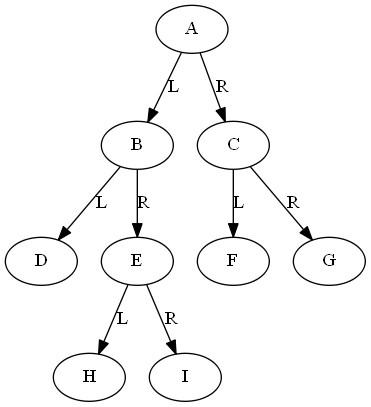

In [196]:
def ConstructByLevel(string, debug=False):
    '''
    @param string: 
        string is the level traverse of the complete tree
        #      represents empty
        a char represents a node 
    @return:
        the binary tree construct according to the given string
    '''
    if not string or string=='#':
        return None
    string = string.split(' ')
    dot = Digraph()
    dot_idx = [0,]
    
    def create_node(val, dot, dot_idx):
        dot_idx[0] += 1
        dot.node(name=str(dot_idx[0]),label=val)
        return BNode(val, dot_idx[0])
    
        
    root = create_node(string[0], dot, dot_idx)
    
    node_queue = [root]
    idx, slen = 0, len(string)
    while node_queue and idx < slen:
        node = node_queue.pop()
        idx += 1
        if idx < slen and string[idx] !='#':
            #newone = BNode(string[idx])
            
            newone = create_node(string[idx], dot, dot_idx)
            if debug:
                print(node.val,' -> ', newone.val)
            dot.edge(node.idx, newone.idx,'L')
            node.left = newone
            node_queue.insert(0, newone)
        idx += 1
        if idx < slen and string[idx] != '#':
            newone = create_node(string[idx], dot, dot_idx)
            if debug:
                print(node.val,' -> ', newone.val)
            dot.edge(node.idx, newone.idx,'R')
            node.right = newone
            node_queue.insert(0, newone)
    fname='draw_png/binary_tree'
    draw_png(dot, fname)
    return root

s = 'A B C D E F G # # H I'
root = ConstructByLevel(s)
Image(filename=r'draw_png\binary_tree.png')

In [197]:
def levelTraverse(root):
    if not root:
        return
        
    q = [root]
    last = root
      
    while q:
        node = q.pop()
        print(node.val,end=' ')
        if node.left:
            #print(node.left.val,end=' ')
            q.insert(0, node.left)
            
        if node.right:
            #print(node.right.val,end=' ')
            q.insert(0, node.right)
            
        if node == last:
            print('')
            if q:
                last = q[0]
levelTraverse(root)

A 
B C 
D E F G 
H I 


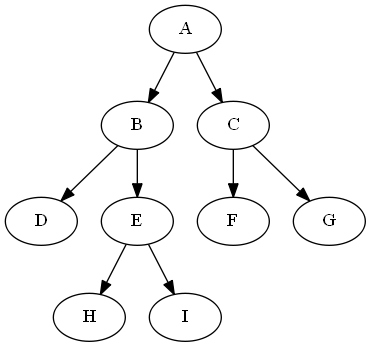

In [198]:
def draw_tree(root, fname='draw_png/binary_tree2'):
    if not root:
        return
    
    def preOrderPrint(root, dot, dot_idx):
        if root != None:
            dot_idx[0] += 1
            root.idx = str(dot_idx[0])
            dot.node(name=str(dot_idx[0]),label=root.val)
            
            if root.left:
                preOrderPrint(root.left, dot, dot_idx)
                dot.edge(root.idx, root.left.idx)
            if root.right:
                preOrderPrint(root.right, dot, dot_idx)
                dot.edge(root.idx, root.right.idx)
                
    dot = Digraph()
    dot_idx = [0,]
    preOrderPrint(root, dot, dot_idx)
    #print(dot.source)
    
    draw_png(dot, fname)

draw_tree(root)
Image(filename=r'draw_png\binary_tree2.png')

In [199]:
def preOrderPrint(root):
    if root != None:
        print(root.val, end = ' ')
        preOrderPrint(root.left)
        preOrderPrint(root.right)
preOrderPrint(root)

A B D E H I C F G 

In [200]:
def inOrderPrint(root):
    if root:
        inOrderPrint(root.left)
        print(root.val, end=' ')
        inOrderPrint(root.right)
inOrderPrint(root)

D B H E I A F C G 

In [201]:
def postOrderPrint(root):
    if root:
        postOrderPrint(root.left)
        postOrderPrint(root.right)
        print(root.val, end=' ')
postOrderPrint(root)

D H I E B F G C A 

In [202]:
'''
Input: Binary tree: [1,2,3,4]
       1
     /   \
    2     3
   /    
  4     

Output: "1(2(4))(3)"

Explanation: Originallay it needs to be "1(2(4)())(3()())", 
but you need to omit all the unnecessary empty parenthesis pairs. 
And it will be "1(2(4))(3)".
'''
class Solution:
    def printTree(self, root):
        ret=str(root.val)+'('
        #print(ret)
        if root.left:
            ret += self.printTree(root.left)
            
        ret += ')'

        if root.right:
            ret += '(' + self.printTree(root.right) + ')'
        
        if not root.left and not root.right:
            ret = ret[:-2]
        return ret
    def tree2str(self, t):
        """
        :type t: TreeNode
        :rtype: str
        """
        if not t:
            return ""
        ret = self.printTree(t)
        return ret
s = Solution()
s.tree2str(root)

'A(B(D)(E(H)(I)))(C(F)(G))'

In [203]:
p = 'A B D E H I C F G'
i = 'D B H E I A F C G'
def ConstructCore_PI(preOrder, inOrder):
    if not preOrder:
        return None
    if len(preOrder) == 1 or len(inOrder) == 1:
        if len(preOrder) == len(inOrder) and preOrder[0] == inOrder[0]:
            return BNode(preOrder[0])
        else:
            raise RuntimeError("unmatched error : preOrder = ",preOrder,' inOrder = ',inOrder)
    p_val, mid = preOrder[0], 0

    while mid < len(inOrder):
        if inOrder[mid] == p_val:
            break
        mid += 1
    root = BNode(p_val)
    if mid > 0:
        root.left = ConstructCore_PI(preOrder[1 : mid+1], inOrder[:mid])
    if mid < len(inOrder):
        root.right = ConstructCore_PI(preOrder[mid+1:], inOrder[mid+1:])
    return root

def ConstructByPre_In(sp, si):
    sp = sp.strip().split(' ')
    si = si.strip().split(' ')

    return ConstructCore_PI(sp, si)
    
root = ConstructByPre_In(p, i)
preOrderPrint(root)
print('\n')
inOrderPrint(root)

A B D E H I C F G 

D B H E I A F C G 

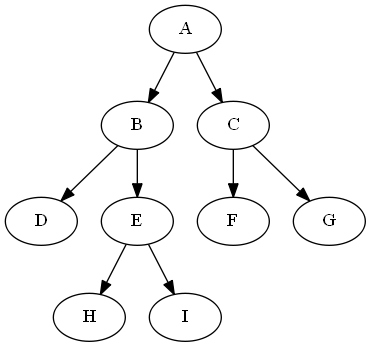

In [205]:
filename=r'draw_png\test.png'
draw_tree(root, filename)
Image(filename=filename)